In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [36]:
df = pd.read_csv('data.csv')

In [58]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [38]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [40]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [42]:
# Total number of missing values in the dataset column wise grouped
total_missing = df.isnull().sum()

print(f'Total missing values: {total_missing}')


Total missing values: Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [44]:
#Total number of missing values in the dataset
total_missing = df.isnull().sum().sum()
print(total_missing)

3850


In [46]:
df = df.dropna()

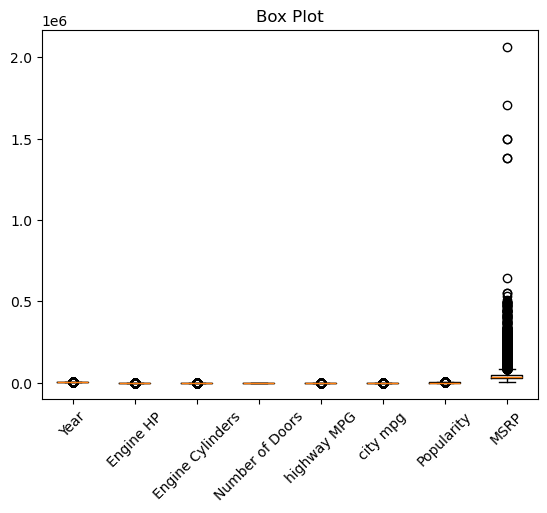

In [48]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
plt.boxplot([df[col] for col in numerical_columns])
plt.title('Box Plot')
plt.xticks(range(1, len(numerical_columns) + 1), numerical_columns, rotation=45)
plt.show()

In [49]:
q1 = np.percentile(df['MSRP'],25)
q3 = np.percentile(df['MSRP'],75)

IQR = q3-q1;

high = q3 + IQR*1.5
low = q1 - IQR*1.5


In [52]:
outliers = np.where((df['MSRP']>high) | (df['MSRP']<low))

In [54]:
print(outliers)

(array([ 267,  268,  269,  270,  271,  272,  273,  274,  275,  276,  277,
        278,  279,  415,  416,  417,  418,  419,  420,  421,  422,  423,
        424,  425,  426,  427,  428,  503,  504,  509,  510,  511,  512,
        513,  514,  515,  516,  517,  518,  519,  520,  521,  522,  523,
        524,  525,  526,  527,  528,  531,  532,  534,  536,  538,  540,
        541,  544,  545,  546,  547,  548,  550,  551,  553,  554,  555,
        556,  558,  560,  561,  562,  563,  568,  569,  570,  571,  572,
        573,  574,  575,  576,  577,  578,  579,  580,  582,  583,  586,
        587,  589,  591,  592,  593,  594,  780,  781,  782,  783,  784,
        785,  786,  787,  788,  789,  790,  791,  792,  793,  794,  795,
        796,  797,  798,  799,  800,  801,  802,  803,  804,  805,  806,
        807,  808,  809,  810,  811,  812,  813,  814,  815,  816,  817,
        818,  819,  820,  821,  822,  823,  824,  825,  826,  827,  828,
        829,  830,  831,  832,  833,  834,  835,  

In [62]:
corr_coeff=df['Engine HP'].corr(df['city mpg'],method='pearson')

In [64]:
corr_coeff

-0.5127787909403498

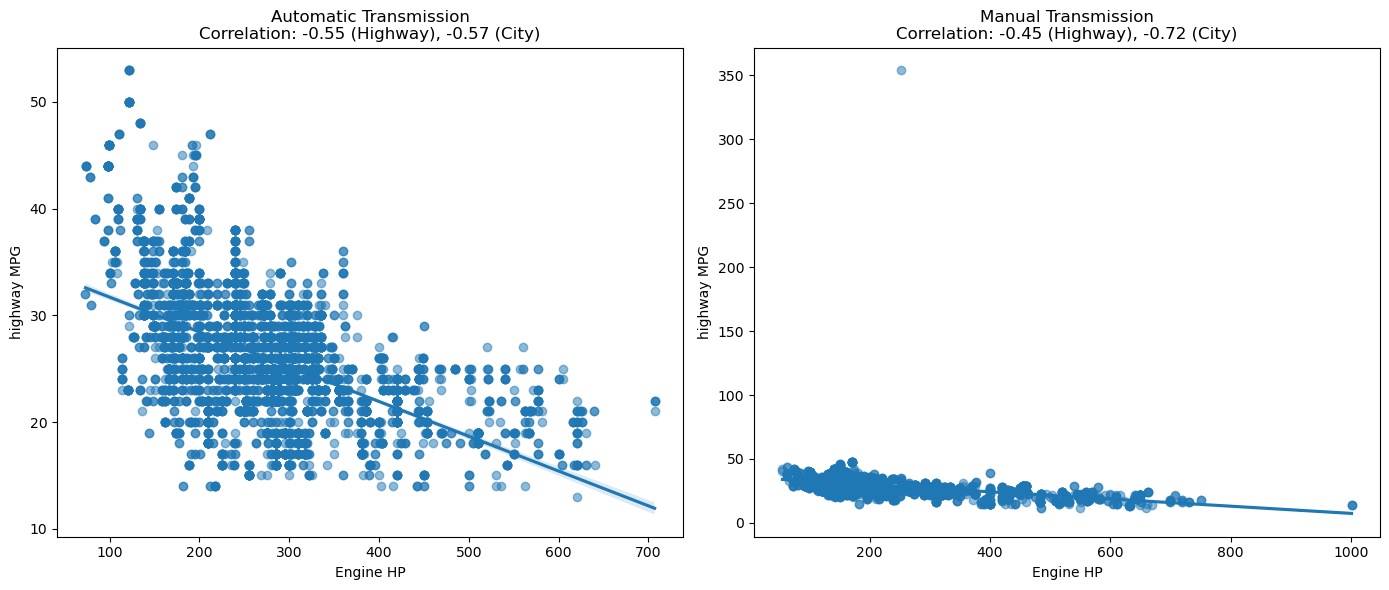

Automatic Transmission - Correlation between HP and Highway MPG: -0.546903694099693
Automatic Transmission - Correlation between HP and City MPG: -0.565638530240159
Manual Transmission - Correlation between HP and Highway MPG: -0.4496715680825647
Manual Transmission - Correlation between HP and City MPG: -0.7152794854397686


In [76]:




# Step 1: Data Preparation - Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Engine HP', 'highway MPG', 'city mpg', 'Transmission Type', 'MSRP'])

# Step 2: Filtering Data based on Transmission Type
df_auto = df_clean[df_clean['Transmission Type'].str.contains('Automatic', case=False)]
df_manual = df_clean[df_clean['Transmission Type'].str.contains('Manual', case=False)]

# Step 3: Calculating Correlation
# For Automatic Transmission
correlation_auto_highway = df_auto['Engine HP'].corr(df_auto['highway MPG'])
correlation_auto_city = df_auto['Engine HP'].corr(df_auto['city mpg'])

# For Manual Transmission
correlation_manual_highway = df_manual['Engine HP'].corr(df_manual['highway MPG'])
correlation_manual_city = df_manual['Engine HP'].corr(df_manual['city mpg'])

# Step 4: Visualization
plt.figure(figsize=(14, 6))

# Correlation for Automatic
plt.subplot(1, 2, 1)
sns.regplot(x='Engine HP', y='highway MPG', data=df_auto, scatter_kws={'alpha':0.5})
plt.title(f'Automatic Transmission\nCorrelation: {correlation_auto_highway:.2f} (Highway), {correlation_auto_city:.2f} (City)')

# Correlation for Manual
plt.subplot(1, 2, 2)
sns.regplot(x='Engine HP', y='highway MPG', data=df_manual, scatter_kws={'alpha':0.5})
plt.title(f'Manual Transmission\nCorrelation: {correlation_manual_highway:.2f} (Highway), {correlation_manual_city:.2f} (City)')

plt.tight_layout()
plt.show()

# Output correlation values
print(f"Automatic Transmission - Correlation between HP and Highway MPG: {correlation_auto_highway}")
print(f"Automatic Transmission - Correlation between HP and City MPG: {correlation_auto_city}")
print(f"Manual Transmission - Correlation between HP and Highway MPG: {correlation_manual_highway}")
print(f"Manual Transmission - Correlation between HP and City MPG: {correlation_manual_city}")


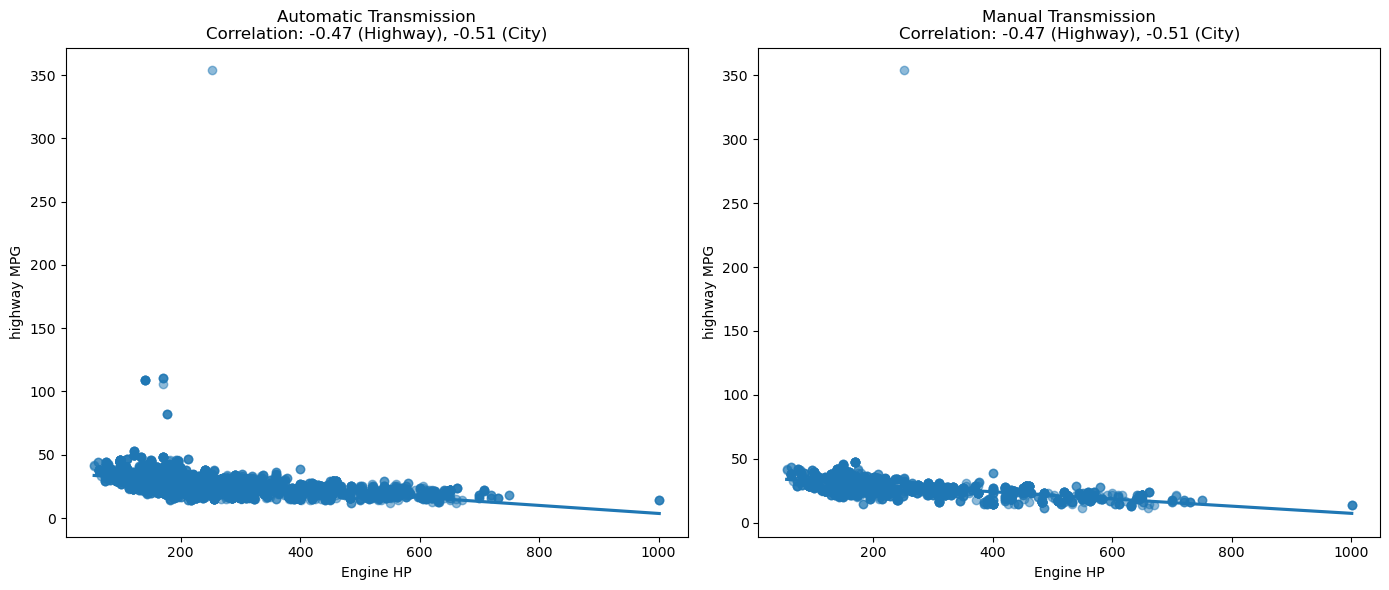

Automatic Transmission - Correlation between HP and Highway MPG: -0.4730194131907641
Automatic Transmission - Correlation between HP and City MPG: -0.5127787909403498
Manual Transmission - Correlation between HP and Highway MPG: -0.4730194131907641
Manual Transmission - Correlation between HP and City MPG: -0.5127787909403498


In [78]:
# Calculate the correlation between Engine HP and Price
correlation_hp_price = df_clean['Engine HP'].corr(df_clean['MSRP'])

# Output the correlation value
print(f"Correlation between Engine HP and Price: {correlation_hp_price}")

# Calculate the correlation between Engine HP and Price
correlation_hp_price = df_clean['Engine HP'].corr(df_clean['MSRP'])

# Output the correlation value
print(f"Correlation between Engine HP and Price: {correlation_hp_price}")


Correlation between Engine HP and Price: 0.6566622068736608
Correlation between Engine HP and Price: 0.6566622068736608
